### Multicollinearity & VIFs

Using the notebook here, answer the quiz questioons below regarding multicollinearity.

To get started let's read in the necessary libraries and the data that will be used.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices # a Python package for describing statistical models
import statsmodels.api as sm; # statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor #
%matplotlib inline

df = pd.read_csv('house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.`Use [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) to look at pairwise relationships for all of the quantitative, explanatory variables in the dataset by running the cell below.  You might also investigate how to add color (**hue**) for the house style or neighborhood.  Use the plot to answer the first quiz questions below.

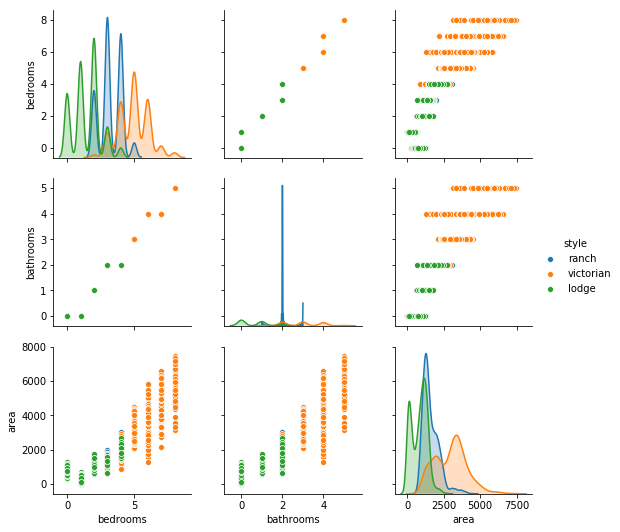

In [10]:
# Seaborn Scatterplot Matrix
sns.pairplot(df, vars=df[['bedrooms', 'bathrooms', 'area']], hue="style");

> From the scatter pairwise plots it appears that the predictor variables are correlated with one another of 'bedrooms', 'bathrooms', and 'area'.

`2.` Earlier, you fit linear models between each individual predictor variable and price, as well as using all of the variables and the price in a multiple linear regression model. Each of the individual models showed a positive relationship - that is, when bathrooms, bedrooms, or area increase, we predict the price of a home to increase. 

Fit a linear model to predict a home **price** using **bedrooms**, **bathrooms**, and **area**. Use the summary to answer the second quiz question below. **Don't forget an intercept.**

In [3]:
# Multiple Linear Regression (MLR) using Ordinary Least Square (OLS) method

df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'bathrooms', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 14 Jan 2019   Prob (F-statistic):               0.00
Time:                        03:46:53   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> As the number of bedrooms increases, we predict the price to decrease.
As the number of bathrooms increases, we predict the price to increase.
As the area of home increases, we predict the price to increase.

`3.` Calculate the VIFs for each variable in your model.  Use quiz 3 below to provide insights about the results of your VIFs.  [Here](https://etav.github.io/python/vif_factor_python.html) is the helpful post again, in case you need it!

In [5]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

In [6]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


> We should remove either bedrooms of bathrooms, because they both have VIFs greater than 10.

`4.` Remove bathrooms from your above model.  Refit the multiple linear regression model and re-compute the VIFs.  Use the final quiz below to provide insights about your results.

In [9]:
lm = sm.OLS(df['price'], df[['intercept', 'bedrooms', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Mon, 14 Jan 2019   Prob (F-statistic):               0.00
Time:                        04:05:59   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405   -1.06e+04    2.63e+04
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
area         346.4458      7.152     48.443      0.000     332.426     360.466
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
y, X = dmatrices('price ~ area + bedrooms', df, return_type = 'dataframe')

In [11]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


> After removing bathrooms, all VIFs are below 10.
> Compared to having three explanatory variables, the Multiple Linear Regression (MLR) with removing one of variables that have VIFs greater than 10 have all of the coefficient positive as we would expect. 
> The R-squared values for the two MLRs are the same, suggesting both bedrooms and bathrooms are not needed for the model.  